In [4]:
import pandas as pd
from prophet import Prophet
import pyarrow.parquet as pq

In [2]:
df = pd.read_parquet(r'/content/part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet')
print(df.head())

     internal_store_id  internal_product_id distributor_id transaction_date  \
0  7384367747233276219   328903483604537190              9       2022-07-13   
1  3536908514005606262  5418855670645487653              5       2022-03-21   
2  3138231730993449825  1087005562675741887              6       2022-09-06   
3  3681167389484217654  1401422983880045188              5       2022-09-11   
4  7762413312337359369  6614994347738381720              4       2022-02-18   

  reference_date  quantity  gross_value    net_value  gross_profit  \
0     2022-07-01       1.0    38.125000    37.890625     10.042625   
1     2022-03-01       6.0   107.250000   106.440002     24.732002   
2     2022-09-01       3.0    56.625000    56.220001     14.124002   
3     2022-09-01     129.0  1037.160023  1037.160023    156.348026   
4     2022-02-01       1.0    26.230000    23.950241      6.550241   

     discount     taxes  
0    3.950000  0.234375  
1   17.100000  0.810000  
2    5.250000  0.405000  


In [ ]:
parquet_file = pq.ParquetFile(r'/content/part-00000-tid-6364321654468257203-dc13a5d6-36ae-48c6-a018-37d8cfe34cf6-263-1-c000.snappy.parquet')
for i in range(parquet_file.num_row_groups):
    row_group_table = parquet_file.read_row_group(i)
    df_chunk = row_group_table.to_pandas()
    # Process df_chunk here
    print(df_chunk)

                      produto          categoria  \
0           69753381296344216            Package   
1         5019314249828979377  Distilled Spirits   
2         4016404282141162328  Distilled Spirits   
3         6217366559810422145  Distilled Spirits   
4         7356488787409434558              Draft   
...                       ...                ...   
32719675  4279417275695769877               Wine   
32719676   452788847648188316  Distilled Spirits   
32719677  3588363396259000624               Wine   
32719678  7816218079460138158              Draft   
32719679  8521664686505973677              Draft   

                                                  descricao  \
0         MONDAY NIGHT BREW DON'T CALL IT HOTLANTA 6/4/1...   
1                      BARRELL V907 RED PHONE BOOTH & TOWER   
2         DRINKWORKS SIMPLY REFRESHING GIN & TONIC 12/4/...   
3                   CENZON REPOSADO 100% AGAVE 6/750ML 80PF   
4                                 REFORMATION STARK 1/4 KEG 

In [3]:
df2 = pd.read_parquet(r'/content/part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet')
print(df2.head())

                   pdv      premise categoria_pdv  zipcode
0  2204965430669363375   On Premise  Mexican Rest    30741
1  5211957289528622910   On Premise   Hotel/Motel    80011
2  9024493554530757353  Off Premise   Convenience    80751
3  8659197371382902429   On Premise    Restaurant    80439
4  1400854873763881130   On Premise    Restaurant    30093


In [3]:
m = Prophet()
m.fit(df)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)

#aux = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
#print(aux)

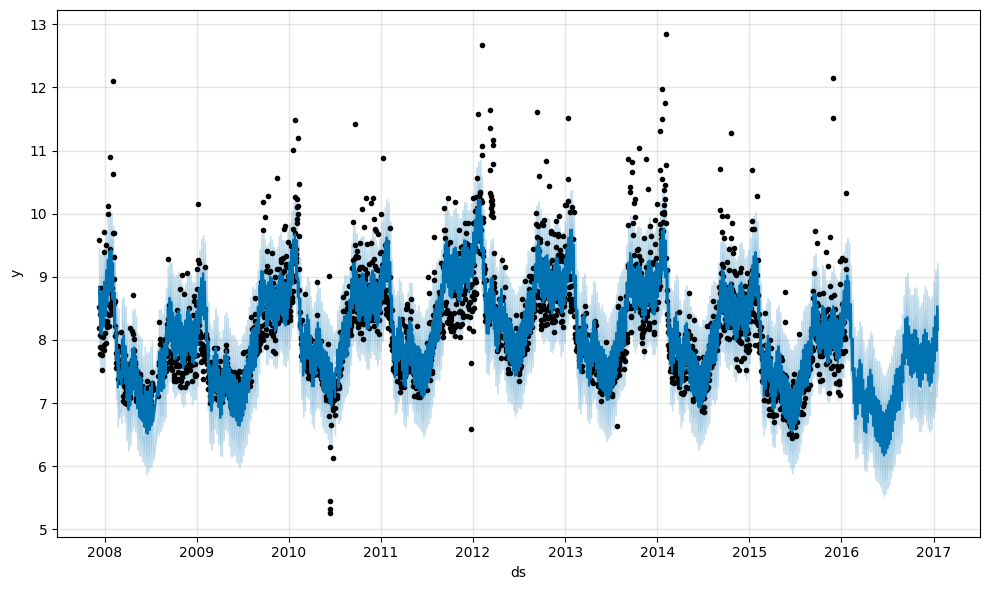

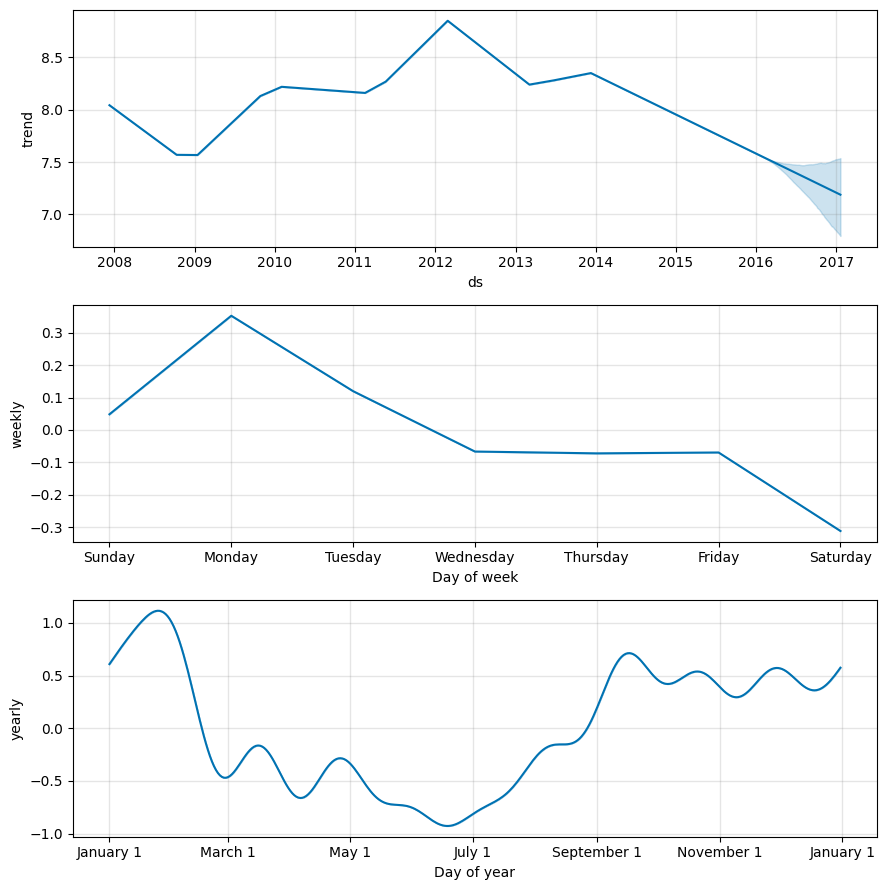

In [ ]:
fig1 = m.plot(forecast)
fig1.savefig('fig1')

fig2 = m.plot_components(forecast)
fig2.savefig('fig2')